In [1]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get


In [2]:
# Intialize KF

# Number of samples
N = 1000

# Sampling size
Ts = 0.001

# Sample range
sample_range = np.linspace(0,1,N)

# System matrix - state
F = np.array([[1, Ts], [0,1]])

# System matrix - input
G = np.array([[-0.5*(Ts**2)], [-Ts]])
# G = [[-0.5*(Ts**2)], [-Ts]]

# Input vector
u = 9.80665

# Observation matrix
H = np.array([1,0])

# Sigma - Standard Deviations
Q = np.array([[0,0],[0,0]])

# Process noise covariance matrix
# Q_0 = np.array([[(Ts**3)/3, (Ts**2)/2], [(Ts**2)/2, Ts]])
# Q = sigma2Q * (Q_0)
# P = 10 *Q

# R = sigma2R * 1

# Identity matrix
I = np.identity(2)



In [3]:
# Define the initial position and velocity
# Position - m
y0 = 100
# Velocity - m/s
v0 = 0

In [4]:
# Initialize the state vector
x_t = np.zeros((2,N))
x_t[:,0] = [y0,v0]
x_t

array([[100.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [5]:
# Time update - prediction
for k in range(1,N):
    x_t[:,k] = np.dot(F,x_t[:,k-1]) + np.dot(G.T,u)

print(x_t)
# print(x_t + G*u)

[[ 1.00000000e+02  9.99999951e+01  9.99999804e+01 ...  9.51260508e+01
   9.51162687e+01  9.51064767e+01]
 [ 0.00000000e+00 -9.80665000e-03 -1.96133000e-02 ... -9.77723005e+00
  -9.78703670e+00 -9.79684335e+00]]


In [6]:
# Generate noisy measurements from state
# m^2/s^2
for k in range(1,N):
    x_t[:,k] = np.dot(F,x_t[:,k-1]) + np.dot(G.T,u)
R = 0
# Measurement noise
v = np.sqrt(R) + np.random.randn(N)
# Noisy measurement
z = np.matmul(H,x_t) + v



In [7]:
# Activate Kalman Filter

# Initialize state vector
x = np.zeros((2,N))
x[:,0] = [105,0]

# Initialize the covariance matrix
# P = np.array([[10,0],[0, 0.01]])
P = np.array([[0.01,0.01],[0.01, 0.01]])

for k in range(1,N):
    x[:,k] = np.dot(F,x[:,k-1]) + np.dot(G.T,u)
    P = np.matmul(F, np.matmul(P,F.T)) + Q
    S = np.matmul(H,np.matmul(P,H.T)) + R
    K = np.matmul(P,H.T)/S
    nu = z[k] - np.matmul(H,x[:,k-1])
    x[:,k] = x[:,k-1] + np.dot(K,nu)
    P = P - np.dot(K,np.dot(S,K.T))
#     P = np.matmul((I - np.matmul(K,H)),P)

In [8]:
# # # Activate Kalman Filter

# # # Initialize state vector
# # x = np.zeros((2,N))
# # x[:,0] = [105,0]

# # # Initialize the covariance matrix
# # P = np.array([[10,0],[0, 0.01]])


# # Perform Kalman filter
# for k in range(1,N):
#     # Predict the state vector
#     x[:,k] = np.matmul(F,x[:,k-1]) + (G*u).T
#     # Predict the covariance
#     P_0 = np.matmul(F,P)
#     P = np.matmul(P_0,np.transpose(F)) + Q
#     # Calculate Kalman Gain
#     S = np.matmul(np.matmul(H,P),np.transpose(H)) + R
#     K = np.matmul(P,np.transpose(H))/S
#     # Update the state vector
#     nu = z[k] - np.matmul(H,x[:,k-1])
#     x[:,k] = x[:,k-1] + np.dot(K,nu)
#     # Update the covariance
#     P = np.matmul((I - np.matmul(K,H)),P)
    


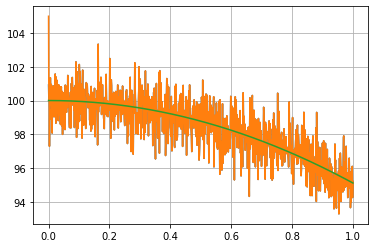

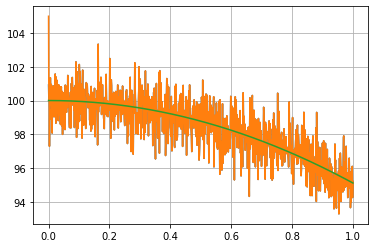

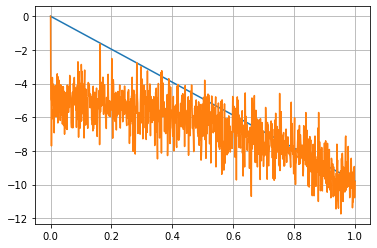

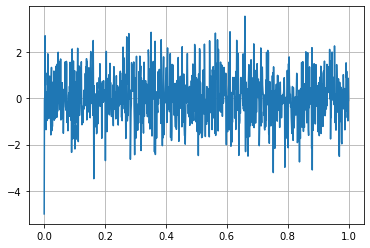

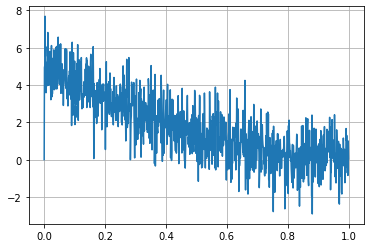

In [9]:
# Plot

plot1 = plt.figure(1)
plt.plot(sample_range, z, sample_range,x[0,:],sample_range,x_t[0,:])
plt.grid()

plot2 = plt.figure(2)
plt.plot(sample_range, z, sample_range,x[0,:],sample_range,x_t[0,:])
plt.grid()

plot3 = plt.figure(3)
plt.plot(sample_range,x_t[1,:], sample_range, x[1,:])
plt.grid()

# plot4 = plt.figure(4)
# plt.plot(sample_range,x_t[0,:], sample_range, x)
# plt.grid()

plot5 = plt.figure(5)
plt.plot(sample_range,x_t[0,:] - x[0,:])
plt.grid()

plot6 = plt.figure(6)
plt.plot(sample_range,x_t[1,:] - x[1,:])
plt.grid()


plt.show()